# Tagging Voids

In [1]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D

In [2]:
Beta = 1.0
BoxLength = 100
N = 5000
R = [40, 30, 30, 40]
seed = 1000

# Void Type: SV MSV IV MIV
# (Spherical Void, Multiple Spherical Voids, Irregular Void, Multiple Irregular Void)
VOID_TYPE = "MIV"


# Observational Catalog
prefix = "/home/filipo/master_thesis/data/Testing_Data/"
filename = prefix + str(VOID_TYPE) + "_R" + str(R) + "_BL" + str(BoxLength) + "_N" + str(N) + "_clean.cat"

print("Loading the Observed Catalog from the file:", filename)
OC = np.loadtxt(filename)


# Random Field Catalog
prefix = "/home/filipo/master_thesis/data/Testing_Data/"
filename = prefix + "rndcat_N" + str(N) + "_BL" + str(BoxLength) + "_seed" + str(seed) + ".cat"
print("Loading the Random Point Catalog")
RC = np.loadtxt( filename)

# Create the full catalog, by vertical stacking Random Catalog and Obs. Catalog.

FC = np.vstack([RC,OC])

FC.shape


filename = "FC_N" + str(N) + "_" + str(VOID_TYPE) + ".cat"

np.savetxt(filename, FC)
print("Full Catalog (RC + OC) data saved to local directory as ./'" + filename + "'.")






Loading the Observed Catalog from the file: /home/filipo/master_thesis/data/Testing_Data/MIV_R[40, 30, 30, 40]_BL100_N5000_clean.cat
Loading the Random Point Catalog
Full Catalog (RC + OC) data saved to local directory as ./'FC_N5000_MIV.cat'.


The random set has been created. Go to terminal and run "make BETA=1.0"

```bash
make NPARTICLES=5000 BETA=1.0 VOID_TYPE=MIV
```

FC_N5000_MIV_Beta1.0.bsk
 Loading 1.0-Skeleton from the file: FC_N5000_MIV_Beta1.0.bsk


<IPython.core.display.Javascript object>


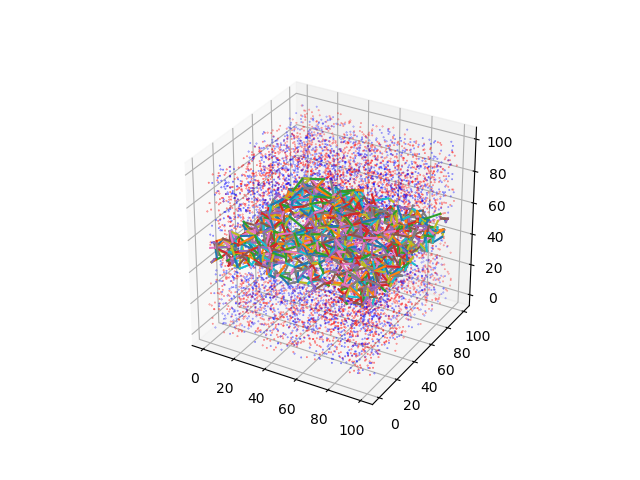

'\nplt.savefig("MIV_N5000/scatter_OC_RC_plus_slice_of_" +\n                str(Beta) + "-Skeleton" +\n                "_N" + str(N) +\n                "_BL" + str(BoxLength) +\n                "_R" + str(R) +\n                 ".pdf", format="pdf")\n'

In [3]:
filename ="FC_N5000_MSV_Beta1.0.bsk"

filename = "FC_N" + str(N) + "_" + VOID_TYPE + "_Beta" + str(Beta) + ".bsk"

print(filename)

print(" Loading " + str(Beta) + "-Skeleton from the file: " + filename)
# Full Catalog (cat + rndm) Beta Skeleton
fcBSkel = np.loadtxt(filename)


fcBSkel = fcBSkel.astype(int)

index = np.where( fcBSkel[:,0] < N )[0]

first_filter = fcBSkel[index].astype(int)
first_filter.shape


BetaSkeleton = first_filter


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_aspect('equal')


x = FC[:,0]
y = FC[:,1]
z = FC[:,2]

# Random Points
x_r = FC[:N,0]
y_r = FC[:N,1]
z_r = FC[:N,2]


ax.scatter(x_r, y_r, z_r, c="blue", s=0.1)

# Random Points
x_o = FC[N:,0]
y_o = FC[N:,1]
z_o = FC[N:,2]

ax.scatter(x_o, y_o, z_o, c="red", s=0.1)

slice_height = 5

BS_size = BetaSkeleton.shape[0]
for n in range( BS_size ):
    i, j = BetaSkeleton[n]
    #print (BetaSkeleton[n])
    
    i = int(i)
    j = int(j)
    
    if( (abs(z[i] - BoxLength/2) < slice_height)
        &(abs(z[j] - BoxLength/2) < slice_height) ):
        ax.plot(xs=[x[i], x[j]], ys=[y[i],y[j]], zs=[z[i],z[j]])
    
plt.show()

"""
plt.savefig("MIV_N5000/scatter_OC_RC_plus_slice_of_" +
                str(Beta) + "-Skeleton" +
                "_N" + str(N) +
                "_BL" + str(BoxLength) +
                "_R" + str(R) +
                 ".pdf", format="pdf")
"""       

In [6]:
index = np.where( first_filter[:,1] >= N )[0]
droplist_raw = first_filter[index,0]
droplist = set(droplist_raw)

print( len(droplist) )

4289


In [7]:
rndmcat_index = set(range(N))

candidates = rndmcat_index.difference(droplist)
candidates = list(candidates)
void_cat = FC[candidates]

0.1


<IPython.core.display.Javascript object>


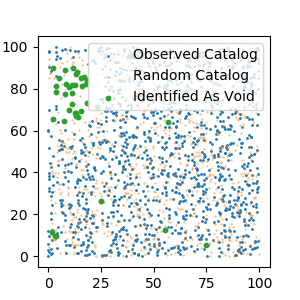

0.3


<IPython.core.display.Javascript object>


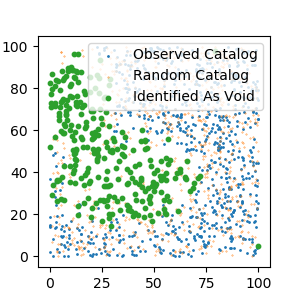

0.5


<IPython.core.display.Javascript object>


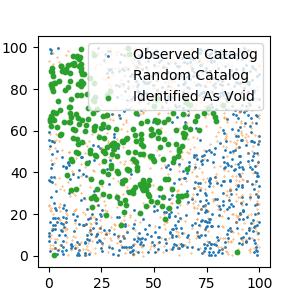

0.7


<IPython.core.display.Javascript object>


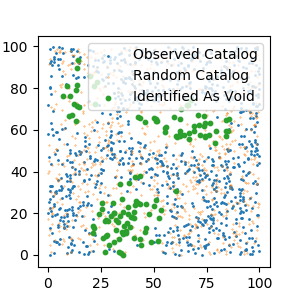

0.9


<IPython.core.display.Javascript object>


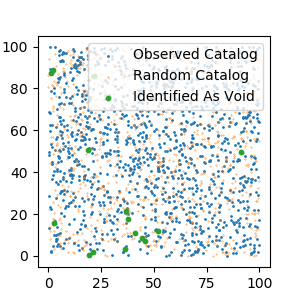

In [8]:
for i in np.linspace(0.1,0.9,5):
    i = np.round(i,decimals=1)
    print(i)
    
    
    slice_height = 10
    
    BoxCenter = i * BoxLength

    fig = plt.figure(figsize=[3,3])

    index = np.where( abs(OC[:,2] - BoxCenter) < slice_height )        
    plt.scatter(OC[index,0], OC[index,1], s=1, label="Observed Catalog")

    index = np.where( abs(RC[:,2] - BoxCenter) < slice_height )        
    plt.scatter(RC[index,0], RC[index,1], s=0.1, label="Random Catalog")

    index = np.where( abs(void_cat[:,2] - BoxCenter) < slice_height )        
    plt.scatter(void_cat[index,0], void_cat[index,1], s=10, label="Identified As Void")

    plt.legend(loc=1)

    """
    plt.savefig("MIV_N5000/slice_OC_RC_plus_VP" +
                    "_N" + str(N) +
                    "_BL" + str(BoxLength) +
                    "_R" + str(R) +
                    "_" + str(BoxCenter) +
                     ".pdf", format="pdf")
                     """


<IPython.core.display.Javascript object>


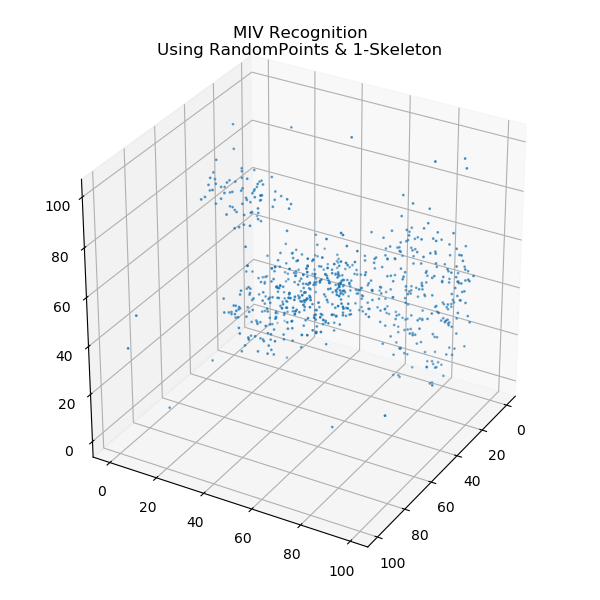

'\nplt.savefig("RandomPoints_Recognized_Void_" \n            + str(VOID_TYPE) +"_N" + str(N) \n            + "_BL" + str(BoxLength)\n            + "_R" + str(R) \n            + "_" + str(Beta) + "-skeletons.pdf")\n            '

In [118]:
x = void_cat[:,0]
y = void_cat[:,1]
z = void_cat[:,2]

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
ax.set_aspect('equal')

ax.scatter(x, y, z, s=1)
ax.view_init(30, 30)

plt.title(VOID_TYPE +" Recognition" + "\nUsing RandomPoints & 1-Skeleton")
plt.tight_layout()

#plt.close()

plt.show()

"""
plt.savefig("RandomPoints_Recognized_Void_" 
            + str(VOID_TYPE) +"_N" + str(N) 
            + "_BL" + str(BoxLength)
            + "_R" + str(R) 
            + "_" + str(Beta) + "-skeletons.pdf")
            """


# Tagging Voids

Using a kind of "friend of friend" method, the "friends" (neighbors) of the candidates are stored.
Candidates are random points!.

In [10]:
index=[]

for k in candidates:
    index.extend( list( np.where( BetaSkeleton[:,0] == k)[0].astype(int) ) )

index = list(set(index ) )
index.sort()

# Beta-Skeleton of Voids
VoidsBS = np.array(BetaSkeleton[index]).astype(int)
print(VoidsBS.shape)
print(len(candidates))

(5328, 2)
711


<IPython.core.display.Javascript object>


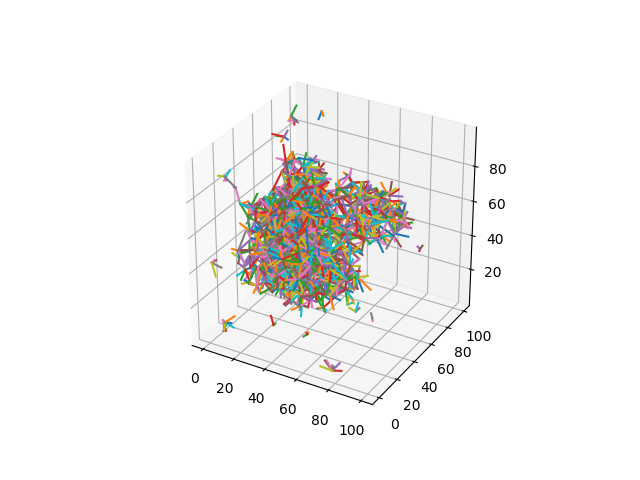

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_aspect('equal')


x = FC[:,0]
y = FC[:,1]
z = FC[:,2]

VBS_size = VoidsBS.shape[0]
for n in range( VBS_size ):
    i, j = VoidsBS[n]
    
    i = int(i)
    j = int(j)
    
    ax.plot(xs=[x[i], x[j]], ys=[y[i],y[j]], zs=[z[i],z[j]])
    
plt.show()

In [12]:
np.savetxt("BS_of_Voids.bsk", VoidsBS)

In [13]:
voids = []



In [14]:
VoidsBS

array([[   4,  534],
       [   4,  725],
       [   4, 3795],
       ...,
       [4998, 1617],
       [4998, 4409],
       [4998, 3444]])

In [15]:
candidates.sort()

In [18]:
candidates[:5]

[4, 8, 18, 21, 23]

In [19]:
candidates[5:7]

[29, 37]

In [20]:
a = candidates[:5]

MasterList = []


for search in a:
    is_in_master = any( search in sublist for sublist in MasterList)

    # If is the first time it appears on the MasterList
    if not is_in_master:
        my_list = []

        index = np.where(VoidsBS[:,0] == search)
        my_list.append(search)
        my_list.extend( list(VoidsBS[index,1][0]) )
        MasterList.append(my_list)

    if is_in_master:
        print(search)
        
MasterList[2].append(29)
MasterList[3].append(29)
MasterList[0].append(29)
MasterList.append([])

a = candidates[5:7]

for search in a:
    
    is_in_master = any( search in sublist for sublist in MasterList)

    print ( "Is", search, "in MasterList?", is_in_master)
    
    # If is the first time it appears on the MasterList
    if not is_in_master:
        my_list = []

        index = np.where(VoidsBS[:,0] == search)
        my_list.append(search)
        my_list.extend( list(VoidsBS[index,1][0]) )
        my_list.sort()
        MasterList.append(my_list)

    if is_in_master:
        repetitions = []
        
        for k in range(len(MasterList)):
            if(search in MasterList[k]):
                sublist = MasterList[k]
                print("Si está en la sublista", k, sublist)
                repetitions.append(k)
                
        print(search, "appears in sublists:" , repetitions)
        

        if ( len(repetitions) == 1 ):
            j = repetitions[0]
            index = np.where(VoidsBS[:,0] == search)
 
            print("Index:", index)
            my_list = list(VoidsBS[index,1][0])
            my_list.sort()
            MasterList[j].extend(my_list)
        
        elif (len(repetitions) > 1):
            print("Friend of many friends, n=", len(repetitions))
            my_list = []
            for j in repetitions:
                my_list.extend(MasterList[j])
                MasterList[j]=[]
            my_list.sort()
            MasterList.append(my_list)

print("This is MasterList")
for x in MasterList:
    print( x)

Is 29 in MasterList? True
Si está en la sublista 0 [4, 534, 725, 3795, 3997, 29]
Si está en la sublista 2 [18, 2191, 656, 2425, 3040, 4423, 4926, 2384, 2540, 3299, 29]
Si está en la sublista 3 [21, 1787, 3412, 2503, 2493, 4144, 4677, 3366, 900, 29]
29 appears in sublists: [0, 2, 3]
Friend of many friends, n= 3
Is 37 in MasterList? False
This is MasterList
[]
[8, 1450, 1947, 1471, 1108, 387, 706, 3448]
[]
[]
[23, 216, 3383, 4429, 4567, 2993, 116, 4726, 3897, 2733, 4715]
[]
[4, 18, 21, 29, 29, 29, 534, 656, 725, 900, 1787, 2191, 2384, 2425, 2493, 2503, 2540, 3040, 3299, 3366, 3412, 3795, 3997, 4144, 4423, 4677, 4926]
[37, 1177, 1263, 1394, 1682, 3299, 4926, 4987]


In [21]:
MasterList[4]

[23, 216, 3383, 4429, 4567, 2993, 116, 4726, 3897, 2733, 4715]

In [104]:
MasterList = []

for search in candidates:
    
    is_in_master = any( search in sublist for sublist in MasterList)

    #print ( "Is", search, "in MasterList?", is_in_master)
    
    # If is the first time it appears on the MasterList
    if not is_in_master:
        my_list = []

        index = np.where(VoidsBS[:,0] == search)
        my_list.append(search)
        my_list.extend( list(VoidsBS[index,1][0]) )
        my_list.sort()
        MasterList.append(my_list)

    if is_in_master:
        repetitions = []
        
        for k in range(len(MasterList)):
            if(search in MasterList[k]):
                sublist = MasterList[k]
                #print("Si está en la sublista", k, sublist)
                repetitions.append(k)
                
        #print(search, "appears in sublists:" , repetitions)
        

        if ( len(repetitions) == 1 ):
            j = repetitions[0]
            index = np.where(VoidsBS[:,0] == search)
 
            #print("Index:", index)
            my_list = list(VoidsBS[index,1][0])
            my_list.sort()
            MasterList[j].extend(my_list)
        
        elif (len(repetitions) > 1):
            # print("Friend of many friends, n=", len(repetitions))
            my_list = []
            for j in repetitions:
                my_list.extend(MasterList[j])
                MasterList[j]=[]
            my_list.sort()
            MasterList.append(my_list)
            
while( [] in MasterList):
    MasterList.remove([])

In [105]:
for j in range(len(MasterList)):
    MasterList[j] = list( set(MasterList[j]))
    MasterList[j].sort()

Now, is necesary to check if maybe the algorytm has created two sublists with common elements.

In [106]:
to_merge = []

for i in range(len(MasterList)):
    for j in range(len(MasterList)):
        if (j > i):
            aux = [x for x in MasterList[i] if x in MasterList[j]]
            if (len(aux)>0):
                print( i, j, aux)
                to_merge.append([i,j])

1 24 [3845]
4 24 [2453]
7 18 [3232]
7 24 [469, 550, 3583]
13 24 [60, 995, 2366, 3555, 4941]
17 24 [1208, 2804, 3526]
18 24 [4127, 4442]
21 22 [2986]
21 26 [4750]


In [107]:
to_merge

[[1, 24],
 [4, 24],
 [7, 18],
 [7, 24],
 [13, 24],
 [17, 24],
 [18, 24],
 [21, 22],
 [21, 26]]

In [108]:
to_merge2 = []
for i in range( len(to_merge)):
    x = to_merge[i][0]
    y = to_merge[i][1]
    
    is_in_list1 = any( x in sublist for sublist in to_merge2 )
    is_in_list2 = any( y in sublist for sublist in to_merge2 )
    
    if( (is_in_list1 == False) & (is_in_list2 == False) ):
        to_merge2.append(to_merge[i])
    
    elif( (is_in_list1 == False) & (is_in_list2 == True) ):
            aux = []
            for j in range(len(to_merge2)):
                if( y in to_merge2[j]):
                    to_merge2[j].append(x)

    elif( (is_in_list1 == True) & (is_in_list2 == False) ):
            aux = []
            for j in range(len(to_merge2)):
                if( x in to_merge2[j]):
                    to_merge2[j].append(y)

    
for x in to_merge2:
    x.sort()
    
print( to_merge2)

[[1, 4, 13, 17, 24], [7, 18], [21, 22, 26]]


In [109]:
for sublist in to_merge2:
    aux = []
    for x in sublist:
        aux.extend(MasterList[x])
        MasterList[x] = []
    aux.sort()
    MasterList.append(aux)

In [110]:
while( [] in MasterList):
    MasterList.remove([])

In [113]:

colors = cm.rainbow( np.linspace(0,1, len(MasterList)))

<IPython.core.display.Javascript object>


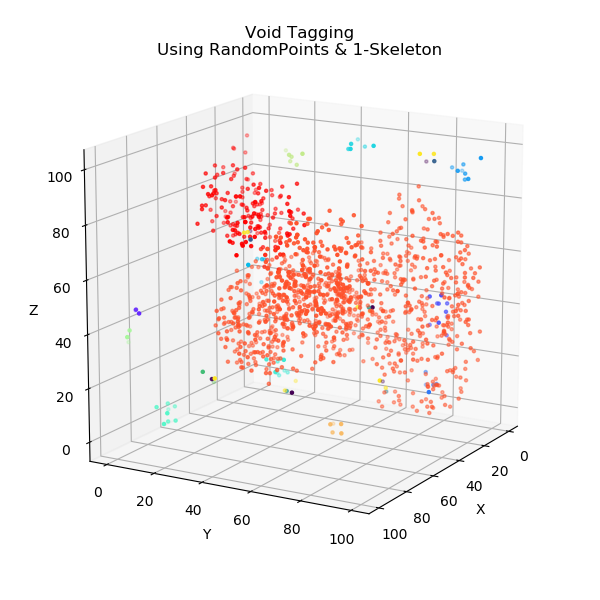

In [126]:
x = RC[:,0]
y = RC[:,1]
z = RC[:,2]

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
ax.set_aspect('equal')

ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")

for k in range(len(MasterList)): 
    void = MasterList[k]
    ax.scatter(x[void], y[void], z[void], s=5, c=colors[k])

ax.view_init(15, 30)

plt.title("Void Tagging\nUsing RandomPoints & 1-Skeleton")
plt.tight_layout()


plt.savefig("./tagging_voids.pdf", format="pdf")
#plt.close()

plt.show()
